   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

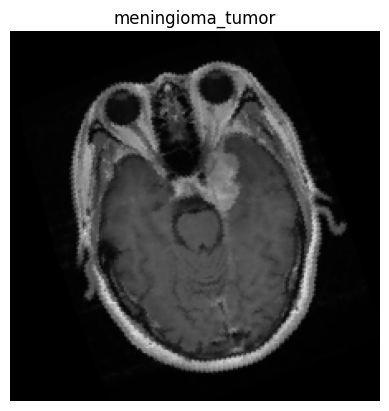

In [2]:
# %% [code]
%run /content/Brain-Tumor-Images-Classification/Data-Preprocessing/Brain_tumor_data_preprocessing.ipynb

In [3]:
# %% [code]
%run /content/Brain-Tumor-Images-Classification/Utils/Save_Load__Model.ipynb

In [5]:
!pip install torch torchvision opencv-python matplotlib imutils
!pip install timm torch torchvision opencv-python matplotlib

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from PIL import Image
import imutils
import timm  # EfficientNet is available through the timm library
from torchvision.datasets import ImageFolder
from google.colab import drive
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import torchvision.models as models
import random
from torchvision import transforms
from sklearn.metrics import classification_report

In [9]:
# Load pretrained model
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=len(dataset.classes))

# Définir l'appareil (GPU si disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Freeze the early layers and fine-tune the last few layers (classifier head)
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze the classifier layer (head)
for param in model.head.parameters():
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss/len(train_loader):.4f}")

    # Save checkpoint after each epoch
    checkpoint = {
       'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss / len(train_loader)
    }
    checkpoint_path = "/content/drive/My Drive/swin_brain_tumor_checkpoint.pth"
    save_checkpoint(checkpoint, checkpoint_path)

print("Training Completed!")

# Evaluation on the validation set
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Accurancy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Epoch 1/20 - Loss: 1.2945
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 2/20 - Loss: 1.1691
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 3/20 - Loss: 1.0813
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 4/20 - Loss: 1.0044
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 5/20 - Loss: 0.9480
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 6/20 - Loss: 0.9077
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 7/20 - Loss: 0.8629
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 8/20 - Loss: 0.8359
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 9/20 - Loss: 0.7984
Checkpoint saved to /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Epoch 10/20 - Loss: 0.7860
Checkpoint saved to /content/drive/My Drive/swin_brain_

 **Model Testing**

In [10]:
def test_random_image(model, test_loader, device, class_names):
    # Set the model to evaluation mode
    model.eval()

    # Get a random sample from the test_loader
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    # Select a random image and its corresponding label
    idx = random.randint(0, len(images) - 1)
    img = images[idx].unsqueeze(0).to(device)  # Add batch dimension and move to device
    true_label = labels[idx].item()

    # Make prediction
    with torch.no_grad():  # Disable gradient calculation
        output = model(img)
        _, predicted = torch.max(output, 1)

    predicted_label = predicted.item()

    # Convert the image back to a format for display
    img = img.squeeze().cpu().numpy().transpose(1, 2, 0)  # Convert to HWC format

    # Normalize the image to match the Swin-Tiny's input normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean  # Denormalize
    img = np.clip(img, 0, 1)  # Ensure the image is in the correct range

    # Display the image along with predicted and actual labels
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_label]} | Actual: {class_names[true_label]}")
    plt.axis('off')
    plt.show()

    # Print the actual and predicted labels
    print(f"Predicted Label: {class_names[predicted_label]}")
    print(f"Actual Label: {class_names[true_label]}")

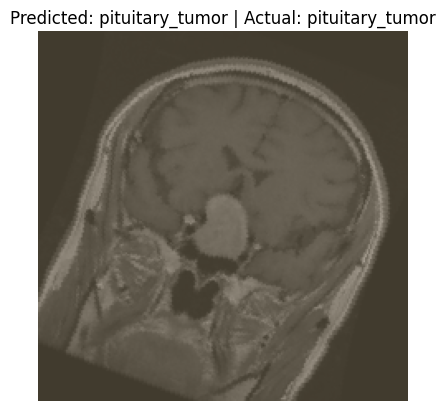

Predicted Label: pituitary_tumor
Actual Label: pituitary_tumor


In [11]:
# Call the function to test on a random image
test_random_image(model, test_loader, device, class_names)